In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
np.random.seed(0)

In [3]:
def Data(pinit_val,qinit_val):
    def hamilton(t,r):
        p, q =r 
        #H = p**2 + q**2 # spring hamiltonian (linear oscillator)
        pdot= -2*q  
        qdot=2*p
        return pdot,qdot
    
    ll=120
    sol=integrate.solve_ivp(hamilton,(0,24),(pinit_val,qinit_val),t_eval=np.linspace(0,24,ll))
    p = sol.y[0] + (np.random.uniform(0,0.6,ll))
    q = sol.y[1] + (np.random.uniform(0,0.6,ll))
    pdot,qdot = -2*q,2*p
    return np.array([p,q,pdot,qdot])

    

In [4]:
full_p,full_q,full_pdot,full_qdot=Data(1,1)

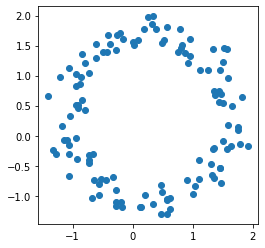

In [5]:
plt.plot(full_p,full_q,'o')
plt.axis('scaled');

In [9]:
train_p,fulltest_p=np.split(full_p,[80])
train_q,fulltest_q=np.split(full_q,[80])
train_pdot,fulltest_pdot=np.split(full_pdot,[80])
train_qdot,fulltest_qdot=np.split(full_qdot,[80])

In [10]:
test_p,new_p=np.split(fulltest_p,[20])
test_q,new_q=np.split(fulltest_q,[20])
test_pdot,new_pdot=np.split(fulltest_pdot,[20])
test_qdot,new_qdot=np.split(fulltest_qdot,[20])

In [30]:
new_pdot

array([ 0.06187991,  0.76675225,  2.19218729,  1.86344533,  2.44658398,
        0.94613348,  0.34739802, -0.19023269, -2.18375339, -2.87144689,
       -2.92575085, -3.08282757, -3.20169234, -1.94707907, -1.19561318,
       -0.33431298,  0.82059792,  1.60326922,  2.36908187,  2.10723497])

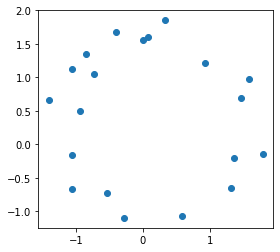

In [11]:
plt.plot(test_p,test_q,'o')
plt.axis('scaled');

In [12]:
train_list=np.array([[train_p,train_q],[train_pdot,train_qdot]])
test_list=np.array([[test_p,test_q],[test_pdot,test_qdot]])
new_list=np.array([[new_p,new_q],[new_pdot,new_qdot]])

In [10]:
# tfp= tf.constant(x)
# tfq= tf.constant(y)
# with tf.GradientTape() as g:
#     g.watch([tfp,tfq])
#     H= tfp**2+ tfq**2
#     dH_dp,dH_dq = g.gradient(H, [tfp,tfq])
#     print(dH_dp,'\n',dH_dq)

In [11]:
#def loss():
    
    

In [ ]:
def HNN():

In [13]:
myModel=keras.models.Sequential()
myModel.add(keras.layers.Flatten(input_shape=[2]))
myModel.add(keras.layers.Dense(200, activation="tanh"))
myModel.add(keras.layers.Dense(200, activation="tanh"))
myModel.add(keras.layers.Dense(2, activation="softmax"))

In [14]:
myModel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 2)                 0         
_________________________________________________________________
dense (Dense)                (None, 200)               600       
_________________________________________________________________
dense_1 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 402       
Total params: 41,202
Trainable params: 41,202
Non-trainable params: 0
_________________________________________________________________


In [15]:
#tf.keras.losses.mean_absolute_error
myModel.compile(loss="mean_squared_error",
                optimizer="Adam",
                metrics=["accuracy"])

In [16]:
x_train=np.transpose(train_list[1])
y_train=np.transpose(train_list[0])

In [17]:
trainedModel=myModel.fit(x_train,y_train, epochs=20)
                        #,validation_data=(X_valid, y_valid))

Epoch 1/20
3/3 [==============================] - 0s 2ms/step - loss: 0.7713 - accuracy: 0.8750
Epoch 2/20
3/3 [==============================] - 0s 2ms/step - loss: 0.6299 - accuracy: 0.9875
Epoch 3/20
3/3 [==============================] - 0s 2ms/step - loss: 0.6155 - accuracy: 1.0000
Epoch 4/20
3/3 [==============================] - 0s 2ms/step - loss: 0.6151 - accuracy: 1.0000
Epoch 5/20
3/3 [==============================] - 0s 2ms/step - loss: 0.6162 - accuracy: 0.9750
Epoch 6/20
3/3 [==============================] - 0s 4ms/step - loss: 0.6168 - accuracy: 1.0000
Epoch 7/20
3/3 [==============================] - 0s 2ms/step - loss: 0.6172 - accuracy: 1.0000
Epoch 8/20
3/3 [==============================] - 0s 3ms/step - loss: 0.6176 - accuracy: 1.0000
Epoch 9/20
3/3 [==============================] - 0s 3ms/step - loss: 0.6178 - accuracy: 1.0000
Epoch 10/20
3/3 [==============================] - 0s 2ms/step - loss: 0.6177 - accuracy: 1.0000
Epoch 11/20
3/3 [======================

<AxesSubplot:>

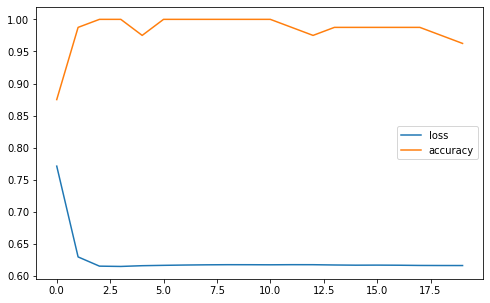

In [18]:
import pandas as pd
pd.DataFrame(trainedModel.history).plot(figsize=(8, 5))


In [19]:
x_test=np.transpose(test_list[1])
y_test=np.transpose(test_list[0])

In [20]:
myModel.evaluate(x_test, y_test)

1/1 [==============================] - 0s 2ms/step - loss: 0.6206 - accuracy: 1.0000


[0.6206342577934265, 1.0]

In [21]:
newx_test=np.transpose(test_list[1])
newy_test=np.transpose(test_list[0])

In [22]:
y_pred = myModel.predict(newx_test)

In [23]:
y_pred

array([[1.2474547e-03, 9.9875259e-01],
       [1.5834982e-04, 9.9984157e-01],
       [8.5904503e-05, 9.9991405e-01],
       [9.8176510e-04, 9.9901819e-01],
       [9.8204007e-03, 9.9017954e-01],
       [9.0702116e-02, 9.0929794e-01],
       [5.9018564e-01, 4.0981439e-01],
       [9.6243429e-01, 3.7565712e-02],
       [9.9901390e-01, 9.8613801e-04],
       [9.9967194e-01, 3.2809220e-04],
       [9.9843174e-01, 1.5682576e-03],
       [9.9944109e-01, 5.5884226e-04],
       [9.5382863e-01, 4.6171404e-02],
       [9.0976638e-01, 9.0233661e-02],
       [1.7689092e-01, 8.2310915e-01],
       [1.6044680e-03, 9.9839550e-01],
       [1.0025100e-03, 9.9899751e-01],
       [8.4450461e-05, 9.9991560e-01],
       [2.9616398e-04, 9.9970382e-01],
       [1.3985675e-04, 9.9986017e-01]], dtype=float32)

In [24]:
pred_pdot,pred_qdot=np.transpose(y_pred)

In [25]:
print(len(pred_qdot))
print(len(pred_pdot))


20
20


In [26]:
y_test

array([[ 0.0815165 ,  1.59688389],
       [-0.40528178,  1.67183369],
       [-1.05502207,  1.12267739],
       [-0.94246923,  0.5027379 ],
       [-1.06356194, -0.15506697],
       [-1.06512886, -0.66717979],
       [-0.53447431, -0.72358555],
       [-0.27945936, -1.10110569],
       [ 0.57577425, -1.07347778],
       [ 1.31705407, -0.65436524],
       [ 1.35807648, -0.20444015],
       [ 1.78695776, -0.14630868],
       [ 1.46289971,  0.68816271],
       [ 1.5888883 ,  0.96819863],
       [ 0.92098921,  1.21234785],
       [ 0.32629118,  1.85257105],
       [ 0.00230628,  1.56183224],
       [-0.84751038,  1.35273643],
       [-0.7338112 ,  1.04820669],
       [-1.40230659,  0.65440883]])

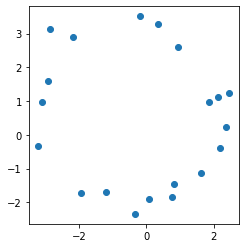

In [27]:
plt.plot(new_pdot,new_qdot,'o')
plt.axis('scaled');

In [32]:
for i in range (len(new_pdot)):
    H=new_pdot[i]+new_qdot[i]
    print(H)

-1.8327413814137956
-1.077874827770765
1.7917408967200896
2.8276986644689917
3.6780396203873247
3.5435065206791707
3.6304663753695836
3.3239513973680745
0.7103460391308158
0.2763050179528461
-1.3283444070575325
-2.1208593448063384
-3.521540756015992
-3.668695290558156
-2.8838914798826614
-2.680477623723082
-0.6485047887578446
0.4749995593294831
2.596594802001479
3.235021143950314


In [33]:
for i in range (len(new_pdot)):
    H=pred_pdot[i]+pred_qdot[i]
    print(H)

1.0
0.99999994
0.99999994
0.99999994
0.99999994
1.0
1.0
1.0
1.0
1.0
1.0
0.99999994
1.0
1.0
1.0000001
1.0
1.0
1.0
1.0
1.0


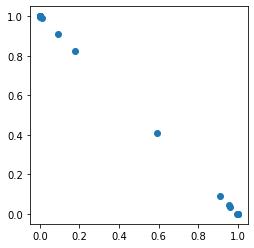

In [28]:
plt.plot(pred_pdot,pred_qdot,'o')
plt.axis('scaled');